# Descripción del proyecto

**Trabajaremos como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para ajustar el presupuesto de publicidad.
Haremos un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendremos los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan y la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Nuestro trabajo será analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.**

# Descripción de Tarifa


**Surf**

**1. Pago mensual: 20 USD**

**2. 500 minutos al mes, 50 SMS y 15 GB de datos**

**3. Si se exceden los límites del paquete:**

**- 1 minuto: 3 centavos**

**- 1 SMS: 3 centavos**

**- 1 GB de datos: 10 USD**

**Ultimate**

**1. Pago mensual: 70 USD**

**2. 3000 minutos al mes, 1000 SMS y 30 GB de datos**

**3. Si se exceden los límites del paquete:**

**- 1 minuto: 1 centavo**

**- 1 SMS: 1 centavo**

**- 1 GB de datos: 7 USD**

**El objetivo de este proyecto es:**

**- Analizar el comportamiento de los clientes y determine qué planes prepagos generan más ingresos**

**- Utilizar análisis para ayudar al departamento comercial a realizar ajustes en el presupuesto de publicidad.**

**- Aplicar el análisis de datos estadísticos a un estudio de caso analítico de la vida real.**

**Los pasos a seguir serían los suguientes:**

**1. Abre el archivo de datos y estudia la información general**

**2. Prepara los datos**

**3. Analiza los datos**

**4. Prueba las hipótesis**

**5. Conclusión general**

## Traeremos las bibliotecas que utilizaremos en este proyecto

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
from math import factorial
from scipy import stats as st
import seaborn as sns
from datetime import datetime

## Se cargan todos los dataframe

In [175]:
calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")
users = pd.read_csv("/datasets/megaline_users.csv")

### Información dataframe calls

In [176]:
#Información general de calls
print("Información de dataframe calls")
print("-----")
calls.head()
#print("-----")
#calls.info()
#print("-----")
#calls.describe()
#print("-----")
#calls.shape
#print("-----")
#calls.isnull().sum()
#print("-----")
#calls.duplicated().sum()

Información de dataframe calls
-----


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [177]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [178]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [179]:
calls.shape

(137735, 4)

In [180]:
calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [181]:
calls.duplicated().sum()

0

### Información sobre dataframe internet

In [182]:
print("Información de dataframe internet")
print("-----")
internet.head()

Información de dataframe internet
-----


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [183]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [184]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [185]:
internet.shape

(104825, 4)

In [186]:
internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [187]:
internet.duplicated().sum()

0

### Información sobre dataframe messages

In [188]:
print("Información de dataframe messages")
print("-----")
messages.head()

Información de dataframe messages
-----


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [189]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [190]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [191]:
messages.shape

(76051, 3)

In [192]:
messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [193]:
messages.duplicated().sum()

0

### Información sobre dataframe plans

In [194]:
print("Información sobre dataframe plans")
print("-----")
plans.head()

Información sobre dataframe plans
-----


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [195]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [196]:
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [197]:
plans.shape

(2, 8)

In [198]:
plans.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [199]:
plans.duplicated().sum()

0

### Información sobre dataframe users

In [200]:
print("Información sobre dataframe users")
print("-----")
users.head()

Información sobre dataframe users
-----


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [201]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [202]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [203]:
users.shape

(500, 8)

In [204]:
users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [205]:
users.duplicated().sum()

0

- **Al imprimir toda la información de los dataframe, concluímos algunos problemas en los datos. En el dataframe calls, la columna "call_date" tenemos que cambiar los tipos de datos a datatime.**

- **Lo mismo sucede en el dataframe internet en la columna "session_date", dataframe messages con la columna "message_date", dataframe users en la columna "reg_date" y "churn_date"**

- **También observamos que el dataframe calls hay que redondear las duraciones de las llamadas.**

- **Lo último que se observó es que el dataframe users, en la columna churn_date, existen 466 datos nulos.**

## Preparación de los datos

 ### Cambiar los tipos de datos de calls

In [206]:
#Cambiar tipo de datos en la columna "call_date" a datatime
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
#Según las instrucciones del proyecto, tendré que agregar columnas a días, meses y año
calls['day'] = calls["call_date"].dt.day_name()
calls['month'] = calls["call_date"].dt.month_name()
calls['year'] = calls["call_date"].dt.year


In [207]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   day        137735 non-null  object        
 5   month      137735 non-null  object        
 6   year       137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 7.4+ MB


In [208]:
# Redondear la columna "duration"
calls['duration'] = (calls['duration'].round())

In [209]:
calls['duration'] = calls['duration'].astype('int64')

In [210]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
 4   day        137735 non-null  object        
 5   month      137735 non-null  object        
 6   year       137735 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 7.4+ MB


In [211]:
calls.head()

,id,user_id,call_date,duration,day,month,year
0,1000_93,1000,2018-12-27,9,Thursday,December,2018
1,1000_145,1000,2018-12-27,14,Thursday,December,2018
2,1000_247,1000,2018-12-27,14,Thursday,December,2018
3,1000_309,1000,2018-12-28,6,Friday,December,2018
4,1000_380,1000,2018-12-30,4,Sunday,December,2018


<div class="alert alert-block alert-info">
<b>Hecho</b> <a class="tocSkip"></a>
</div>

In [212]:
calls.query('duration == 0')

,id,user_id,call_date,duration,day,month,year
19,1001_4,1001,2018-12-05,0,Wednesday,December,2018
25,1001_13,1001,2018-12-24,0,Monday,December,2018
31,1001_30,1001,2018-10-17,0,Wednesday,October,2018
32,1001_31,1001,2018-11-03,0,Saturday,November,2018
34,1001_35,1001,2018-12-21,0,Friday,December,2018
...,...,...,...,...,...,...,...
137720,1499_189,1499,2018-12-27,0,Thursday,December,2018
137722,1499_191,1499,2018-12-24,0,Monday,December,2018
137725,1499_194,1499,2018-10-31,0,Wednesday,October,2018
137727,1499_196,1499,2018-11-22,0,Thursday,November,2018


In [213]:
#porcentaje de valores 0 en la columna "duration"
total = 137735
valores_cero = 26834
porcentaje_cero = (valores_cero / total) * 100

In [214]:
porcentaje_cero

19.482339274694162

In [215]:
calls.head()

,id,user_id,call_date,duration,day,month,year
0,1000_93,1000,2018-12-27,9,Thursday,December,2018
1,1000_145,1000,2018-12-27,14,Thursday,December,2018
2,1000_247,1000,2018-12-27,14,Thursday,December,2018
3,1000_309,1000,2018-12-28,6,Friday,December,2018
4,1000_380,1000,2018-12-30,4,Sunday,December,2018


### Cambiar datos de internet

In [216]:
# Cambiar los datos de la columna "session_date" a datatime
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [217]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [218]:
# Crearemos columnas de día, mes y año
internet['day'] = internet["session_date"].dt.day_name()
internet['month'] = internet["session_date"].dt.month_name()
internet['year'] = internet["session_date"].dt.year


In [219]:
internet.head()

,id,user_id,session_date,mb_used,day,month,year
0,1000_13,1000,2018-12-29,89.86,Saturday,December,2018
1,1000_204,1000,2018-12-31,0.00,Monday,December,2018
2,1000_379,1000,2018-12-28,660.40,Friday,December,2018
3,1000_413,1000,2018-12-26,270.99,Wednesday,December,2018
4,1000_442,1000,2018-12-27,880.22,Thursday,December,2018


### Cambiar los datos de messages

In [220]:
#Cambiar los tipos de datos de la columna "message_date" a datatime
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
#Agregar columnas con dia, mes y año
messages['day'] = messages["message_date"].dt.day_name()
messages['month'] = messages["message_date"].dt.month_name()
messages['year'] = messages["message_date"].dt.year

In [221]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   day           76051 non-null  object        
 4   month         76051 non-null  object        
 5   year          76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 3.5+ MB


In [222]:
messages.head()

,id,user_id,message_date,day,month,year
0,1000_125,1000,2018-12-27,Thursday,December,2018
1,1000_160,1000,2018-12-31,Monday,December,2018
2,1000_223,1000,2018-12-31,Monday,December,2018
3,1000_251,1000,2018-12-27,Thursday,December,2018
4,1000_255,1000,2018-12-26,Wednesday,December,2018


### Cambiar los datos de users

In [223]:
#Cambiar los tipos de datos en las columnas "reg_date" y "churn_date"
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [224]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Cambiaremos el nombre de la columna "churn_date" a "expiration_date", ya que es la fecha que se da de baja el servicio**



In [225]:
users.columns = ['user_id', 'first_name', 'last_name', 'age', 'city', 'subscription_date', 'plan', 'expiration_date']

In [226]:
users.head()

,user_id,first_name,last_name,age,city,subscription_date,plan,expiration_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


In [227]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            500 non-null    int64         
 1   first_name         500 non-null    object        
 2   last_name          500 non-null    object        
 3   age                500 non-null    int64         
 4   city               500 non-null    object        
 5   subscription_date  500 non-null    datetime64[ns]
 6   plan               500 non-null    object        
 7   expiration_date    34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Cambiaremos dataframe plans.

In [228]:
plans.columns = ['messages_included', 'data_volume_per_month', 'minutes_included', 'monthly_fee', 'price_per_gb', 'price_per_message', 'price_per_minute', 'plan']
plans.head()

,messages_included,data_volume_per_month,minutes_included,monthly_fee,price_per_gb,price_per_message,price_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Busquemos para cada usuario


### Números de llamadas realizadas y minutos utilizados por mes

In [229]:
#Crearemos una variable para poder visualizar la cantidad de llamadas realizadas por mes
calls_per_month = calls.groupby(['user_id', 'month']).agg({'id': 'count'}).rename(columns={'id': 'calls_made'})
print("Llamadas realizadas de usuarios por mes")
print("")
calls_per_month

Llamadas realizadas de usuarios por mes



calls_made
user_id month                
1000    December           16
1001    August             27
        December           56
        November           64
        October            65
...                       ...
1498    September          45
1499    December           65
        November           45
        October            53
        September          41

[2258 rows x 1 columns]

In [230]:
calls_per_month.describe()

,calls_made
count,2258.000000
mean,60.998671
std,31.770869
min,1.000000
25%,39.000000
50%,60.000000
75%,80.000000
max,205.000000


In [231]:
#Crearemos una variable para poder visualizar los minutos utilizados de los usuarios por mes
min_per_month = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).rename(columns={'duration': 'minutes_spent'})
print("")
min_per_month

minutes_spent
user_id month                   
1000    December             117
1001    August               173
        December             394
        November             404
        October              374
...                          ...
1498    September            346
1499    December             463
        November             287
        October              361
        September            328

[2258 rows x 1 columns]

In [232]:
min_per_month.describe()

,minutes_spent
count,2258.000000
mean,411.383968
std,219.176903
min,0.000000
25%,259.000000
50%,404.000000
75%,543.750000
max,1433.000000


Al visualizar la cantidad de llamadas realizadas por mes, La persona con la tasa de llamadas más alta hizo 205 llamadas y gastó un minuto total de 1510 minutos, mientras que la persona con la tasa de llamadas más baja hizo solo 1 llamada con 0 minutos, lo que podría haber sido incluso una llamada perdida. Dado que la media de minutos invertidos es levemente mayor que la mediana, esperamos que la distribución esté sesgada hacia la derecha. 


### La cantidad de los SMS enviados por mes.

In [233]:
#Veremos la cantidad de mensajes enviados de los usuarios por mes
messages_per_month = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).rename(columns={'id': 'messages_sent'})
messages_per_month

messages_sent
user_id month                   
1000    December              11
1001    August                30
        December              44
        November              36
        October               53
...                          ...
1496    December              11
        November              13
        October               18
        September             21
1497    December              50

[1806 rows x 1 columns]

In [234]:
messages_per_month.describe()

,messages_sent
count,1806.000000
mean,42.110188
std,33.122931
min,1.000000
25%,17.000000
50%,34.000000
75%,59.000000
max,266.000000


En promedio, se enviaron alrededor de 1806 mensajes por usuario por mes. La menor cantidad de mensajes enviados fue 1, mientras que la mayor cantidad de mensajes enviados fue 266. Dado que la media de mensajes enviados es mayor que la mediana, esperamos que la distribución esté sesgada hacia la derecha. Esto significa que los datos podrían contener valores atípicos.

### El volumen de datos por mes.

In [235]:
#Veremos la cantidad de datos utilizados por mes
internet_per_month = (internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})/1024).apply(np.ceil)*1024
print("")
internet_per_month

mb_used
user_id month             
1000    December    2048.0
1001    August      7168.0
        December   19456.0
        November   19456.0
        October    22528.0
...                    ...
1498    September  23552.0
1499    December   22528.0
        November   17408.0
        October    20480.0
        September  13312.0

[2277 rows x 1 columns]

In [236]:
internet_per_month.describe()

,mb_used
count,2277.000000
mean,17396.757137
std,7878.331628
min,1024.000000
25%,13312.000000
50%,17408.000000
75%,21504.000000
max,71680.000000


Del volumen de datos de Internet utilizados por mes, podemos ver que aproximadamente 1499 usuarios usaron datos de 2277 usuarios. En promedio, se usaron alrededor de 17,397 MB de datos. La persona con el volumen de datos más bajo usó 1024 MB, mientras que la persona con el mayor uso de datos usó 71 680 MB de datos. Dado que la media del volumen de datos es ligeramente menor que la mediana, esperaríamos que la distribución estuviera sesgada hacia la izquierda.

### Ahora combinaremos los datos para tener un nuevo conjunto de datos

In [237]:
#Combinamos los datos de resultados recién realizados.
new_df = pd.concat([calls_per_month, min_per_month, messages_per_month, internet_per_month], axis=1).reset_index().fillna(0)
new_df.columns = ['user_id', 'month', 'calls_made', 'call_duration', 'messages_sent', 'mb_used']
new_df = new_df.merge(users, on='user_id')
new_df

,user_id,month,calls_made,call_duration,messages_sent,mb_used,first_name,last_name,age,city,subscription_date,plan,expiration_date
0,1000,December,16.0,117.0,11.0,2048.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,August,27.0,173.0,30.0,7168.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1001,December,56.0,394.0,44.0,19456.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
3,1001,November,64.0,404.0,36.0,19456.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
4,1001,October,65.0,374.0,53.0,22528.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,September,45.0,346.0,0.0,23552.0,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT
2289,1499,December,65.0,463.0,0.0,22528.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT
2290,1499,November,45.0,287.0,0.0,17408.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT
2291,1499,October,53.0,361.0,0.0,20480.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT


In [238]:
#Crearemos una columna que pase de mb a gb usados
new_df['gb_used'] = (new_df['mb_used'] / 1024)


In [239]:
new_df.head()

,user_id,month,calls_made,call_duration,messages_sent,mb_used,first_name,last_name,age,city,subscription_date,plan,expiration_date,gb_used
0,1000,December,16.0,117.0,11.0,2048.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,2.0
1,1001,August,27.0,173.0,30.0,7168.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,7.0
2,1001,December,56.0,394.0,44.0,19456.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,19.0
3,1001,November,64.0,404.0,36.0,19456.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,19.0
4,1001,October,65.0,374.0,53.0,22528.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,22.0


Con nuestra nueva tabla, tenemos las llamadas realizadas por usuarios por mes, los minutos utilizados por mes, los mensajes enviados por mes y la cantidad de datos utilizados en el mes.

**Ahora agregaremos los planes a nuestra tabla.**

In [240]:
new_df = new_df.merge(plans, left_on='plan', right_on='plan')
new_df.head()

,user_id,month,calls_made,call_duration,messages_sent,mb_used,first_name,last_name,age,city,...,plan,expiration_date,gb_used,messages_included,data_volume_per_month,minutes_included,monthly_fee,price_per_gb,price_per_message,price_per_minute
0,1000,December,16.0,117.0,11.0,2048.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaT,2.0,1000,30720,3000,70,7,0.01,0.01
1,1006,December,9.0,54.0,139.0,32768.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18,32.0,1000,30720,3000,70,7,0.01,0.01
2,1006,November,2.0,10.0,15.0,3072.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18,3.0,1000,30720,3000,70,7,0.01,0.01
3,1008,December,85.0,598.0,26.0,15360.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,NaT,15.0,1000,30720,3000,70,7,0.01,0.01
4,1008,November,63.0,422.0,37.0,24576.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,NaT,24.0,1000,30720,3000,70,7,0.01,0.01


### Determinaremos los ingresos de las asignaciones y los cargos extras por plan de cada usuario.

In [241]:
new_df['gb_per_month'] = (new_df['data_volume_per_month'] / 1024).apply(np.ceil)

In [242]:
new_df['message_cost'] = new_df.apply(lambda x: max(0, x['messages_sent'] - x['messages_included']) * x['price_per_message'], axis = 1)
new_df['call_cost'] = new_df.apply(lambda x: max(0, x['call_duration'] - x['minutes_included']) * x['price_per_minute'], axis = 1)
new_df['gb_cost'] = new_df.apply(lambda x: np.ceil(max(0, x['gb_used'] - x['gb_per_month']))*x['price_per_gb'], axis = 1)
new_df['revenue'] =new_df['message_cost'] + new_df['call_cost'] + new_df['gb_cost'] + new_df['monthly_fee']
new_df.head()

,user_id,month,calls_made,call_duration,messages_sent,mb_used,first_name,last_name,age,city,...,minutes_included,monthly_fee,price_per_gb,price_per_message,price_per_minute,gb_per_month,message_cost,call_cost,gb_cost,revenue
0,1000,December,16.0,117.0,11.0,2048.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.0,70.0
1,1006,December,9.0,54.0,139.0,32768.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,3000,70,7,0.01,0.01,30.0,0.0,0.0,14.0,84.0
2,1006,November,2.0,10.0,15.0,3072.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.0,70.0
3,1008,December,85.0,598.0,26.0,15360.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.0,70.0
4,1008,November,63.0,422.0,37.0,24576.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.0,70.0


In [243]:
new_df.columns

Index(['user_id', 'month', 'calls_made', 'call_duration', 'messages_sent',
       'mb_used', 'first_name', 'last_name', 'age', 'city',
       'subscription_date', 'plan', 'expiration_date', 'gb_used',
       'messages_included', 'data_volume_per_month', 'minutes_included',
       'monthly_fee', 'price_per_gb', 'price_per_message', 'price_per_minute',
       'gb_per_month', 'message_cost', 'call_cost', 'gb_cost', 'revenue'],
      dtype='object')

In [244]:
df_final = new_df[['user_id', 'first_name', 'last_name', 'age', 'city', 'month', 'subscription_date', 'plan', 'expiration_date', 'calls_made', 
                   'call_duration', 'minutes_included', 'price_per_minute', 'gb_used', 'gb_per_month', 'price_per_gb', 
                  'messages_sent', 'messages_included', 'message_cost', 'call_cost', 'gb_cost', 'revenue']]
df_final.head()


,user_id,first_name,last_name,age,city,month,subscription_date,plan,expiration_date,calls_made,...,price_per_minute,gb_used,gb_per_month,price_per_gb,messages_sent,messages_included,message_cost,call_cost,gb_cost,revenue
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",December,2018-12-24,ultimate,NaT,16.0,...,0.01,2.0,30.0,7,11.0,1000,0.0,0.0,0.0,70.0
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",December,2018-11-27,ultimate,2018-12-18,9.0,...,0.01,32.0,30.0,7,139.0,1000,0.0,0.0,14.0,84.0
2,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",November,2018-11-27,ultimate,2018-12-18,2.0,...,0.01,3.0,30.0,7,15.0,1000,0.0,0.0,0.0,70.0
3,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",December,2018-08-03,ultimate,NaT,85.0,...,0.01,15.0,30.0,7,26.0,1000,0.0,0.0,0.0,70.0
4,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",November,2018-08-03,ultimate,NaT,63.0,...,0.01,24.0,30.0,7,37.0,1000,0.0,0.0,0.0,70.0


In [245]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            2293 non-null   int64         
 1   first_name         2293 non-null   object        
 2   last_name          2293 non-null   object        
 3   age                2293 non-null   int64         
 4   city               2293 non-null   object        
 5   month              2293 non-null   object        
 6   subscription_date  2293 non-null   datetime64[ns]
 7   plan               2293 non-null   object        
 8   expiration_date    158 non-null    datetime64[ns]
 9   calls_made         2293 non-null   float64       
 10  call_duration      2293 non-null   float64       
 11  minutes_included   2293 non-null   int64         
 12  price_per_minute   2293 non-null   float64       
 13  gb_used            2293 non-null   float64       
 14  gb_per_m

In [246]:
df_final = df_final.copy()

In [247]:
#cambiaremos los tipos de datos float a int en las columnas "calls_made", "messages_sent", "gb_used"
df_final['calls_made'] = df_final['calls_made'].astype('int64')
df_final['messages_sent'] = df_final['messages_sent'].astype('int64')
df_final['gb_used'] = df_final['gb_used'].astype('int64')


In [248]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            2293 non-null   int64         
 1   first_name         2293 non-null   object        
 2   last_name          2293 non-null   object        
 3   age                2293 non-null   int64         
 4   city               2293 non-null   object        
 5   month              2293 non-null   object        
 6   subscription_date  2293 non-null   datetime64[ns]
 7   plan               2293 non-null   object        
 8   expiration_date    158 non-null    datetime64[ns]
 9   calls_made         2293 non-null   int64         
 10  call_duration      2293 non-null   float64       
 11  minutes_included   2293 non-null   int64         
 12  price_per_minute   2293 non-null   float64       
 13  gb_used            2293 non-null   int64         
 14  gb_per_m

**En esta sección, preparamos los datos.**

## Analizar los datos

### Primero describamos el comprotamiento de los clientes

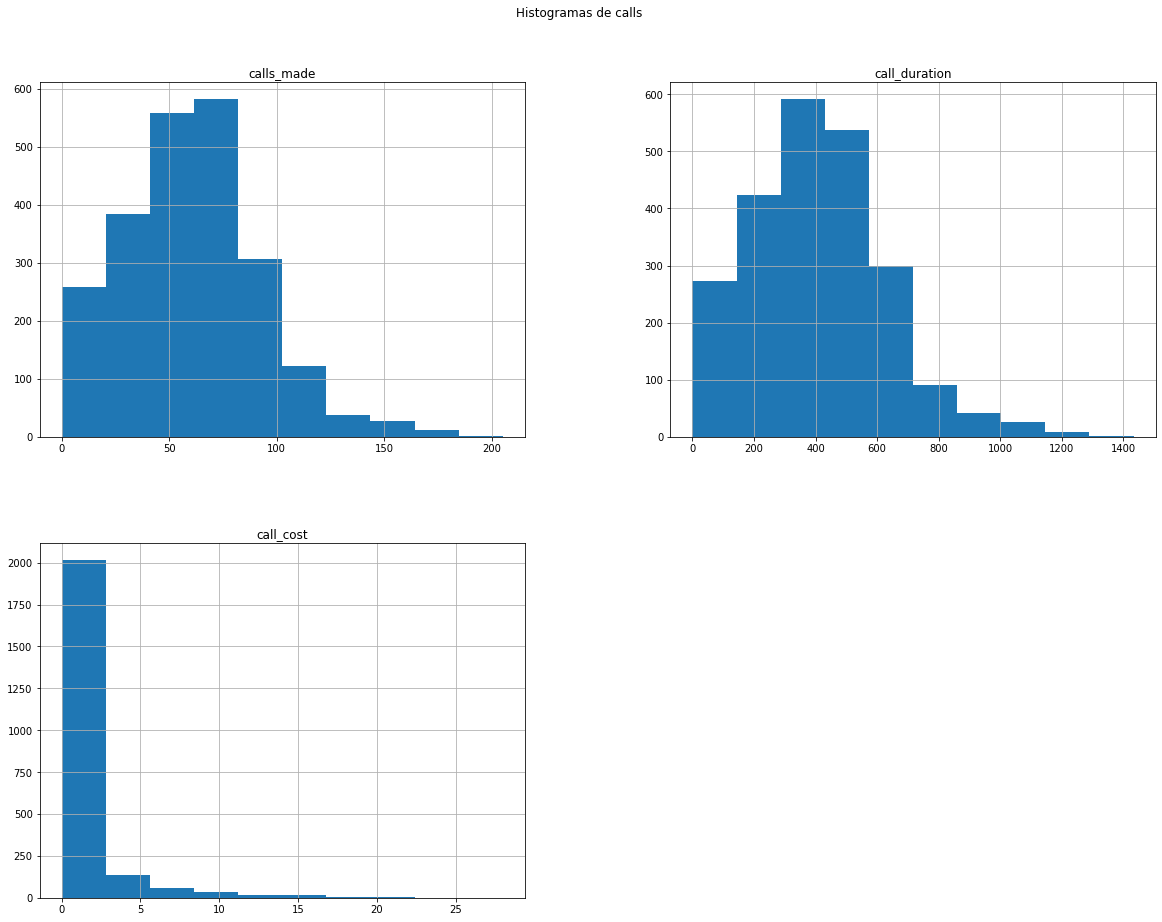

In [249]:
#Haremos histogramas de calls
df_final[['calls_made', 'call_duration', 'call_cost']].hist(bins=10, figsize=(20, 15));
plt.suptitle('Histogramas de calls', y=0.95);

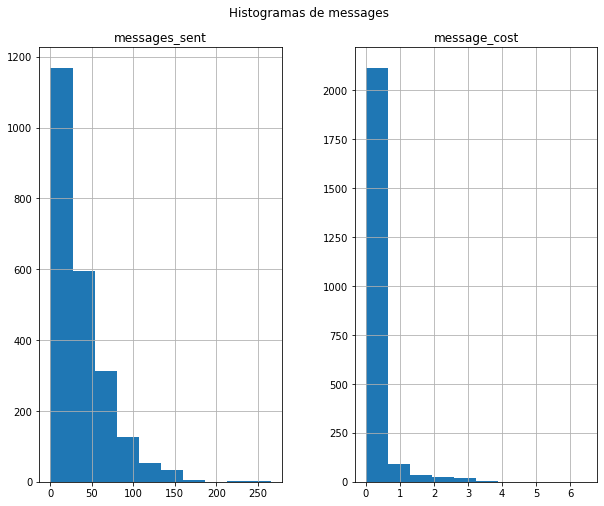

In [250]:
#Haremos histogramas de messages
df_final[['messages_sent', 'message_cost']].hist(bins=10, figsize=(10, 8));
plt.suptitle('Histogramas de messages', y=0.95);

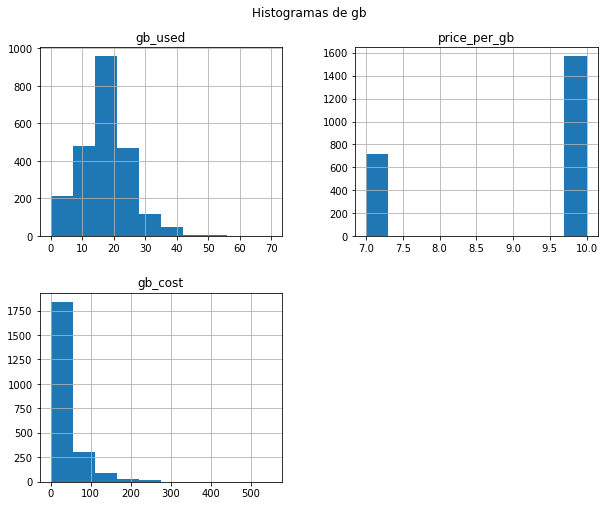

In [251]:
#haremos histogramas de gb
df_final[['gb_used', 'price_per_gb', 'gb_cost']].hist(bins=10, figsize=(10, 8));
plt.suptitle('Histogramas de gb', y=0.95);

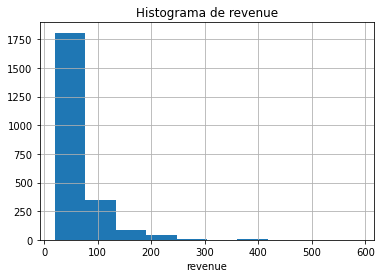

In [252]:
#histograma de revenue
df_final['revenue'].hist()

plt.xlabel('revenue')
plt.title("Histograma de revenue");

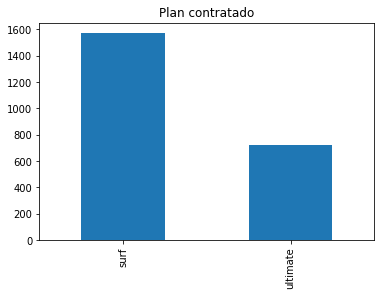

In [253]:
#Gráfico de barra de plan
df_final['plan'].value_counts().plot(kind = 'bar');
plt.title("Plan contratado");

Usamos un histograma para graficar variables numéricas y un diagrama de barras para variable categórica. Los gráficos anteriores muestran la distribución de frecuencia de las características en nuestros datos. Todos los gráficos anteriores, con la excepción del gráfico de barra de plan, muestran que la distribución está algo sesgada a la derecha. En el histograma de mensajes enviados, la mayoría de los mensajes enviados está entre 0 y 266. Dado que la media es mayor que la mediana, podemos concluir que los datos tienen algunos valores atípicos. El gráfico de barras del plan muestra que el plan surf tuvo mayor frecuencia que ultimate. Esto significa que más personas usaron el plan de surf que el plan ultimate. Necesitamos analizar más a fondo los datos para determinar qué plan genera más ingresos. Dado que los datos están sesgados, tendríamos que detectar y eliminar los valores atípicos en los datos.

### Encuentra los minutos, SMS y volumen de datos que requieren los usuarios de cada tarifa por mes.





In [254]:
#Haremos nuevas variables para filtrar datos por planes
data_ultimate = df_final.query('plan == "ultimate"')
plan_ultimate = data_ultimate[['calls_made', 'call_duration', 'messages_sent', 'gb_used', 'revenue']]

plan_ultimate.describe()


,calls_made,call_duration,messages_sent,gb_used,revenue
count,720.000000,720.000000,720.000000,720.000000,720.000000
mean,60.626389,406.116667,37.551389,17.306944,72.313889
std,33.242994,227.148111,34.767179,7.670108,11.395108
min,0.000000,0.000000,0.000000,0.000000,70.000000
25%,36.000000,246.750000,7.000000,13.000000,70.000000
50%,61.000000,399.000000,30.000000,17.000000,70.000000
75%,80.000000,533.000000,61.000000,21.000000,70.000000
max,191.000000,1297.000000,166.000000,46.000000,182.000000


Al filtrar por plan contratado, concluimos que en el plan ultimate, de 720 registros, en las llamadas realizadas, tenemos 60.6 llamadas de media, con 430.45 minutos de duración de media. En mensajes tenemos que de media 37.55 mensajes enviados. En gb usados, nos arroja una media de 17 gb usados.

In [255]:
data_surf = df_final.query('plan == "surf"')
plan_surf = data_surf[['calls_made', 'call_duration', 'messages_sent', 'gb_used', 'revenue']]
plan_surf.describe()

,calls_made,call_duration,messages_sent,gb_used,revenue
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,59.811825,404.641449,31.159568,16.670693,60.324514
std,32.017989,221.544736,33.566717,7.847522,55.262074
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,39.000000,254.000000,3.000000,12.000000,20.000000
50%,60.000000,401.000000,24.000000,17.000000,40.150000
75%,79.000000,544.000000,47.000000,21.000000,80.000000
max,205.000000,1433.000000,266.000000,70.000000,588.630000


En el plan surf, de 1573 registros, las llamadas realizadas nos arrojan 60 llamadas realizadas de media, con un máximo de 205 llamadas. la duración de llamadas es 428 la media, pero un máximo de duración de 1510 minutos, mensajes enviados 31 mensajes la media, con máximo de 266 mensajes y donde la media es bastante superior a la mediana, es decir tiene sesgo positivo. Gb usados fueron 16.67 la media, con una máxima de 70 gb. En revenue, la media es de 60.7, pero con un máximo de 590.37 y donde la media es bastante mayor que la mediana, es decir, tiene un sesgo positivo.

### Calcula la media, la varianza y la desviación estándar

**Calcularemos call_duration**

In [256]:
#Calcularemos la media, varianza y desviación estandar de la duración de las llamadas
df_final.groupby('plan')['call_duration'].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,404.641449,49082.069833,221.544736
ultimate,406.116667,51596.264534,227.148111


In [257]:
df_final.groupby('plan')['call_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,404.641449,221.544736,0.0,254.00,401.0,544.0,1433.0
ultimate,720.0,406.116667,227.148111,0.0,246.75,399.0,533.0,1297.0


Del cálculo anterior, observamos que los usuarios del plan ultimate gastan más minutos al mes que los usuarios del plan surf. 

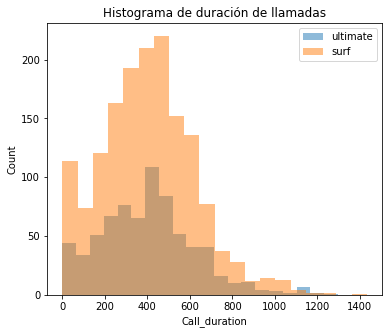

In [258]:
#Crearemos histograma de call_duration por mes
plt.figure(figsize=(6,5))
plt.hist(plan_ultimate['call_duration'], bins=20, alpha=0.5, label='ultimate')
plt.hist(plan_surf['call_duration'], bins=20, alpha=0.5, label='surf')

plt.xlabel('Call_duration', size=10)
plt.ylabel('Count', size=10)
plt.title('Histograma de duración de llamadas')
plt.legend(loc='upper right');

A partir de la superposición del gráfico de histograma, podemos ver que el plan ultimate tiene más duración de llamadas por mes que los usuarios del plan surf, aunque en promedio los usuarios del plan surf realizaron más llamadas que los usuarios del plan ultimate.

**Calcularemos messages_sent**

In [259]:
#Calcularemos la media, varianza y desviación estandar de mensajes enviados por mes
df_final.groupby('plan')['messages_sent'].agg([np.mean, np.var, np.std])


,mean,var,std
plan,,,
surf,31.159568,1126.724522,33.566717
ultimate,37.551389,1208.756744,34.767179


In [260]:
df_final.groupby('plan')['messages_sent'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,31.159568,33.566717,0.0,3.0,24.0,47.0,266.0
ultimate,720.0,37.551389,34.767179,0.0,7.0,30.0,61.0,166.0


Podemos ver que los usuarios del plan ultimate en promedio envían más mensajes por mes que los usuarios del plan de surf. Veamos cómo se distribuye esto usando el gráfico de histograma.

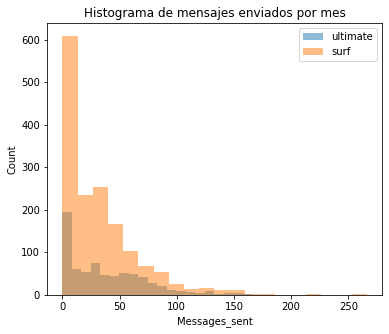

In [261]:
#Crearemos histograma de mensajes enviados por mes
plt.figure(figsize=(6,5))
plt.hist(plan_ultimate['messages_sent'], bins=20, alpha=0.5, label='ultimate')
plt.hist(plan_surf['messages_sent'], bins=20, alpha=0.5, label='surf')

plt.xlabel('Messages_sent', size=10)
plt.ylabel('Count', size=10)
plt.title('Histograma de mensajes enviados por mes')
plt.legend(loc='upper right');

A partir de la superposición del histograma que muestra la distribución del total de mensajes enviados por mes, podemos ver que el plan surf tuvo la mayor cantidad de mensajes totales enviados por mes. Podemos ver que ambos planes tuvieron una tendencia similar. El plan surf tuvo más usuarios que el plan ultimate.

**Calcularemos gb usados en el mes**

In [262]:
#Calcularemos la media, varianza y desviación estandar de gb usados por mes
df_final.groupby('plan')['gb_used'].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,16.670693,61.58360,7.847522
ultimate,17.306944,58.83055,7.670108


In [263]:
df_final.groupby('plan')['gb_used'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,16.670693,7.847522,0.0,12.0,17.0,21.0,70.0
ultimate,720.0,17.306944,7.670108,0.0,13.0,17.0,21.0,46.0


Podemos ver en el cálculo anterior que, en promedio, los usuarios del plan ultimate usan más datos que los usuarios del plan surf. Veamos cómo se distribuye usando el gráfico de histograma

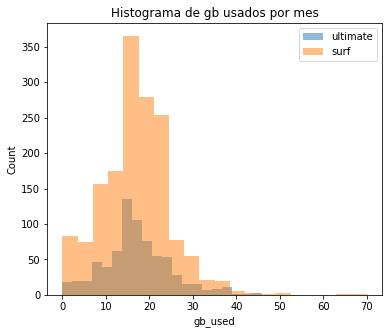

In [264]:
#Crearemos un histograma de volumen de datos por mes
plt.figure(figsize=(6,5))
plt.hist(plan_ultimate['gb_used'], bins=20, alpha=0.5, label='ultimate')
plt.hist(plan_surf['gb_used'], bins=20, alpha=0.5, label='surf')

plt.xlabel('gb_used', size=10)
plt.ylabel('Count', size=10)
plt.title('Histograma de gb usados por mes')
plt.legend(loc='upper right');

El histograma gb usados por mes muestra que el plan surf tenía más usuarios según el volumen de datos requerido por mes. Podemos ver que ambos planes tienen la misma tendencia, excepto que ultimate tiene más valores para el volumen de datos utilizados por mes. 

### Describe las distribuciones de ganancia de los planes.

In [265]:
#Calcular el ingreso promedio de los planes de ultimate y surf
ultimate_avg = plan_ultimate['revenue'].sum() / len(plan_ultimate['revenue'])
surf_avg = plan_surf['revenue'].sum() / len(plan_surf['revenue'])
diferencia = (ultimate_avg - surf_avg) / ultimate_avg * 100
print('El ingreso promedio de usuarios del plan ultimate es ${:.2f}'.format(ultimate_avg))
print('El ingreso promedio de usuarios del plan surf es ${:.2f}'.format(surf_avg))
print('Diferencia porcentual entre los ingresos del plan ultimate y el plan surf es {:.2f}%'.format(diferencia))

El ingreso promedio de usuarios del plan ultimate es $72.31
El ingreso promedio de usuarios del plan surf es $60.32
Diferencia porcentual entre los ingresos del plan ultimate y el plan surf es 16.58%


- En esta sección, calculamos las estadísticas de nuestros datos. Determinamos que los usuarios del plan ultimate, en promedio hacen 60 llamadas, usan 430 minutos por mes, envían alrededor de 38 mensajes y usan 17.3 GB de datos por mes.

- También calculamos estadísticas para los usuarios del plan surf y observamos que, en promedio, los usuarios hacen 59.8 llamadas, usan 428.7 minutos por mes, envían alrededor de 31 mensajes y usan 16.67 GB de datos por mes. 

-  En promedio, los usuarios de ultimate tienen más duración de llamadas por mes, envían más mensajes de texto y requieren más volumen de datos que los usuarios en el plan surf.

- También determinamos que los usuarios del plan ultimate generaron más ingresos en promedio que los usuarios del plan surf.

## Prueba las hipótesis

### El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.


**-Hipótesis nula: no hay diferencia entre los ingresos promedio de los usuarios de los planes ultimate y surf**

**-hipótesis nula: ingreso promedio por mes para usuarios finales = ingreso promedio por mes para usuarios de surf**

**-La hipótesis alternativa es que los ingresos promedio de los usuarios de los planes de llamadas Ultimate y Surf difieren**

**-alternative hypothesis: average revenue per month for ultimate users <> average revenue per month for surf users**

Calculamos el ingreso promedio para los usuarios del plan Ultimate en USD 72,31 y el ingreso promedio para el plan surf en USD 60,71. Queremos saber si la diferencia entre estos números es significativa. Eso depende de la varianza de las muestras a partir de las cuales se calculan los valores. En lugar de basar nuestra comparación solo en la media, usamos los datos para realizar una prueba estadística. En este experimento, la hipótesis nula es que no hay diferencia entre los ingresos promedio de los usuarios del plan Ultimate y Surf. La hipótesis alternativa es que los ingresos promedio de los usuarios de los planes Ultimate y Surf difieren. Usamos un nivel de significación (o alfa) de 0.05, lo que significa que solo en el 5% de los casos rechazaremos la hipótesis nula cuando es verdadera. Usamos una prueba t para probar la hipótesis porque se usa para comparar las medias de dos grupos para determinar si dos grupos son diferentes entre sí.

### Se realiza la prueba de levene, según recomendación

In [266]:
from scipy.stats import levene

In [267]:
#Realizaremos un test de levene
ultimate = plan_ultimate['revenue']
surf = plan_surf['revenue']
stat, p = levene(ultimate, surf)
p

7.291242999435286e-83

In [268]:
[np.var(x, ddof=1) for x in [ultimate, surf]]

[129.8484855509195, 3053.8968171456463]

In [269]:
ultimate = plan_ultimate['revenue']
surf = plan_surf['revenue']

# Establecer significación estadística crítica
alpha = 0.05

# probar la hipótesis de que las medias de las dos poblaciones independientes son iguales
results = st.ttest_ind(ultimate, surf, equal_var = False)
print('p-value: ', results.pvalue)

# comparar el valor p con el nivel de significancia
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipótesis nula')

p-value:  3.475118393050373e-16
Rechazamos la hipótesis nula


Formulamos la hipótesis nula afirmando que no hay diferencia entre los ingresos promedio de los usuarios de los planes Ultimate y Surf. Utilizamos un nivel de significación de 0,05. Dado que el valor p es inferior a 0,05, significa que el grupo es diferente, por lo que rechazamos la hipótesis nula. Nuestro análisis sugiere que los ingresos promedio de los usuarios de los planes Ultimate y Surf difieren.

### El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.


**-Hipótesis nula: no hay diferencia entre los ingresos promedio de los usuarios en el área de NY-NJ y los usuarios de otras regiones**

**-hipótesis nula: ingreso promedio para usuarios en áreas NY-NJ = ingreso promedio para usuarios de otras regiones**

**- Hipótesis alternativa: Existe una diferencia entre los ingresos promedio de los usuarios en el área de NY-NJ y los usuarios de otras regiones**

**-Hipótesis alternativa: ingreso promedio para usuarios en áreas NY-NJ <> ingreso promedio para usuarios de otras regiones**

Usamos un nivel de significación (o alfa) de 0.05, lo que significa que solo en el 5% de los casos rechazaremos la hipótesis nula cuando es verdadera. Usamos una prueba t para probar la hipótesis porque se usa para comparar las medias de dos grupos para determinar si dos grupos son diferentes entre sí.

In [270]:
df_final['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Orlando-Kissimmee-Sanford, FL MSA', 'Cleveland-Elyria, OH MSA',
       'Knoxville, TN MSA', 'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA',
       'Birmingham-Hoover, AL MSA', 'Oklahoma City, OK MSA',
       'Denver-Aurora-Lakewood, CO MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Nashville-Davidson–Murfreesboro–Franklin, TN MSA',
       'Columbus, OH MSA', 'Las Vegas-Henderson-Paradise, NV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA',
       'Miami-Fort Lauderdale-West Palm Beach, FL MSA',
       'Columbia, SC MSA', 'San Antonio-New Braunfels, TX MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Phoenix-Mesa-Chandler, AZ MSA',
       'Riverside-San Bernardino-Ontario, CA MSA',
       'Salt Lake City, 

In [271]:
newyork_jersey = df_final.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # Ingresos para usuarios de NY-NJ
newyork_jersey_not = df_final.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # Ingresos para los usuarios que no son de NY-NJ
print('Los ingresos promedios para los usuarios del area de New York-New Jersey es ${:.2f}'.format(newyork_jersey.mean()))
print('Los ingresos promedios para los usuarios que no son del area New York-New Jersey es ${:.2f}'.format(newyork_jersey_not.mean()))

Los ingresos promedios para los usuarios del area de New York-New Jersey es $59.61
Los ingresos promedios para los usuarios que no son del area New York-New Jersey es $64.97


Hemos determinado el ingreso promedio de los usuarios en el área de Nueva York-Nueva Jersey en 59,92USD y el ingreso promedio de los usuarios de otras regiones en 65,22USD. Queremos saber si la diferencia entre estos números es significativa. Establecemos una prueba de hipótesis para la significancia usando un valor de significancia de 0.05, lo que significa que solo en el 5% de los casos rechazaremos la hipótesis nula cuando sea verdadera. Usamos una prueba t para probar la hipótesis, ya que se puede usar para comparar las medias de dos grupos para determinar si éstos son diferentes entre sí. 

In [272]:
newyork_jersey = df_final.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] 
newyork_jersey_not = df_final.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue']
stat, p = levene(newyork_jersey, newyork_jersey_not, proportiontocut=0.05)
p

0.12833976700938993

In [273]:
[np.var(x, ddof=1) for x in [newyork_jersey, newyork_jersey_not]]

[1890.5129971358429, 2216.8068409104044]

In [274]:
newyork_jersey = df_final.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # Ingresos para usuarios de NY-NJ
newyork_jersey_not = df_final.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # Ingresos para los usuarios que no son de NY-NJ

# Establecer significación estadística crítica
alpha = 0.05

#probar la hipótesis de que las medias de las dos poblaciones independientes son iguales
results = st.ttest_ind(newyork_jersey, newyork_jersey_not, equal_var = True)
print('p-value: ', results.pvalue)

# comparar el valor p con el nivel de significancia

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipótesis nula')


p-value:  0.04073803469236764
Rechazamos la hipótesis nula


Formulamos nuestra hipotesis nula afirmando que no hay diferencia en los ingresos promedios de los usuarios de la zona de NY-NJ y los usuarios de otras zonas. Nuestra hipotesis alternativa era que si existe diferencia entre los ingresos de la zona de NY-NJ y los usuarios de otras zonas. Dado que el valor p es inferior a 0,05, significa que los ingresos en ambos grupos son diferentes, por lo que rechazamos la hipótesis nula.

## Conclusión final

**Al analizar los distintos dataframe, encontramos algunos problemas en los tipos de datos, los cuales corregimos convirtiendo al tipo de dato correcto. Tambien corregimos los datos nulo en users, pasandolos a expiration_date, y colocamos la fecha del último día en la observación de información. Analizamos los datos realizando un análisis exploratorio y descubrimos que la distribución de los datos está ligeramente sesgada hacia la derecha.**

**Determinamos que los usuarios de ultimate en promedio hacen 60 llamadas, usan 430 minutos por mes, envían alrededor de 37 mensajes y usan 17.30 GB de datos por mes. También calculamos estadísticas para los usuarios de surf y observamos que, en promedio, los usuarios hacen 59 llamadas, usan 428 minutos por mes, envían alrededor de 31 mensajes y usan 16.67 GB de datos por mes.**

**Trazamos histogramas de frecuencia de los planes por usuario y observamos que en promedio, los usuarios de ultimate tienen más duración de llamadas por mes, envían más mensajes de texto y requieren más volumen de datos que los usuarios en el plan de surf. También determinamos que los usuarios del plan ultimate generaron más ingresos en promedio que los usuarios del plan surf. También determinamos que los usuarios ultimate generaron más ingresos en promedio, ya que el ingreso promedio de los usuarios en el plan ultimate es un 16.05 % mayor que el de los usuarios en el plan surf. El ingreso promedio calculado para los usuarios del plan ultimate es de 72,31 USD, mientras que el ingreso promedio para el plan surf es de 60.71 USD.**

**Formulamos la hipótesis nula afirmando que no hay diferencia entre los ingresos promedio de los usuarios de los planes  Ultimate y Surf. Utilizamos un nivel de significación de 0,05 para calcular el valor de p. A partir de la prueba de hipótesis, determinamos que el grupo difiere, por lo que rechazamos la hipótesis nula. También probamos la hipótesis afirmando que no hay diferencia entre los ingresos promedio de los usuarios en el área de Nueva York-Nueva Jersey y los usuarios de otras regiones. Nuestra prueba de hipótesis muestra que los ingresos promedio de los usuarios en el área de Nueva York-Nueva Jersey y los usuarios de otras regiones son diferentes.**


**En definitiva concluimos lo siguiente:**

**-Los usuarios del plan ultimate utiliza mas minutos, envía mas mensajes y utiliza mayor cantidad de datos que el plan surf.**

**-Los usuarios del plan ultimate tienen mayor ingresos en la compañia que los usuarios del plan surf.**

**-Hay mas usuarios en el plan surf que en el plan ultimate, por lo que la compañia deberia colocar mas esfuerzo en promocionar el plan ultimate, ya que aporta mas ingresos que en el plan surf.**

**-Los ingresos promedio de los usuarios de Nueva York-New Jersey es menos que los usuarios de otras regiones.**
